In [41]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as imageio


In [42]:
class Parameter:
    cams = [0,1,2,3]
    Vmin = [0,0,0]
    Vmax = [300,300,300]
    N1, N2 = 361, 5
    imx = 2560
    imy = 2160
    pixel_size = 0.0065


params = Parameter()

markers = [np.loadtxt('../cases/case_allmarkers/markers_c'+str(cam)+'.txt') for cam in params.cams]

# xy = markers[0][:,:2]

/tmp/ipykernel_909698/2257040660.py:1: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


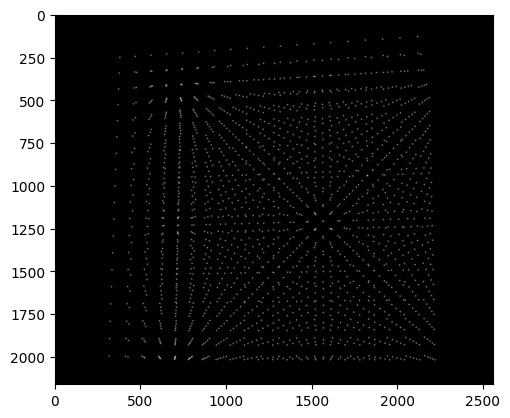

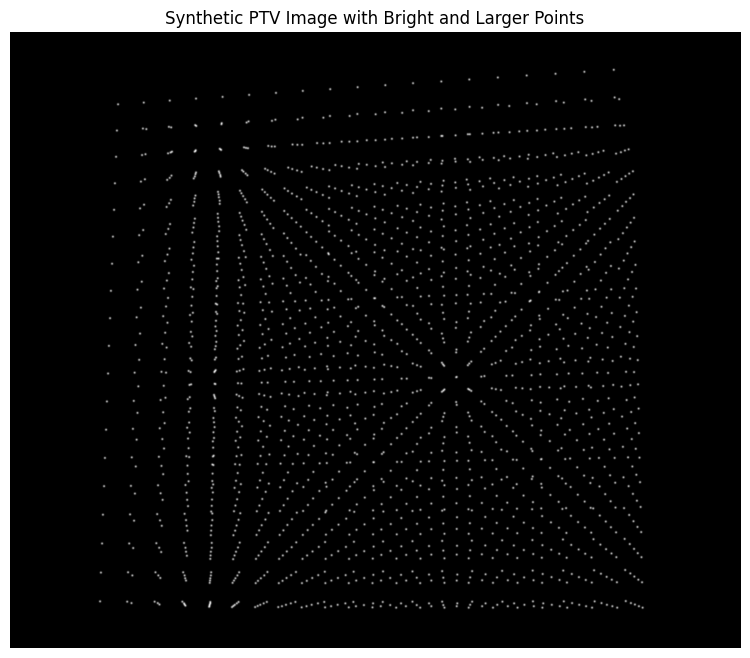

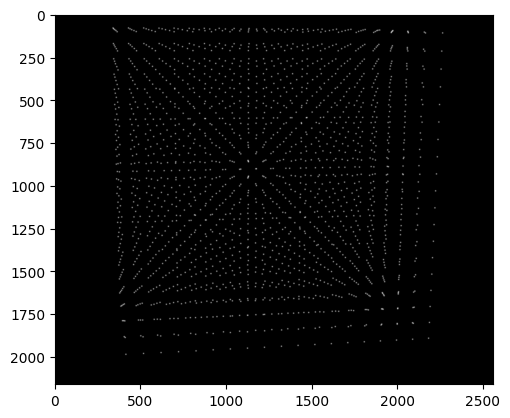

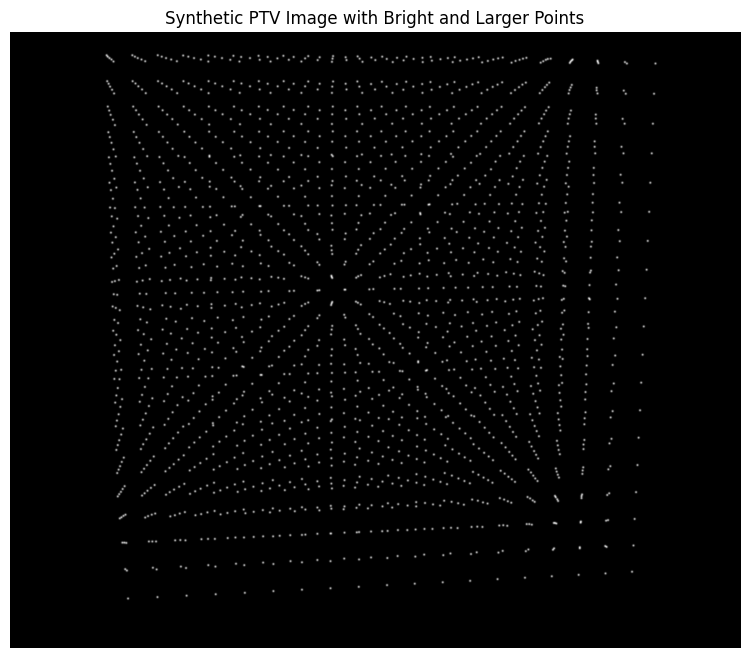

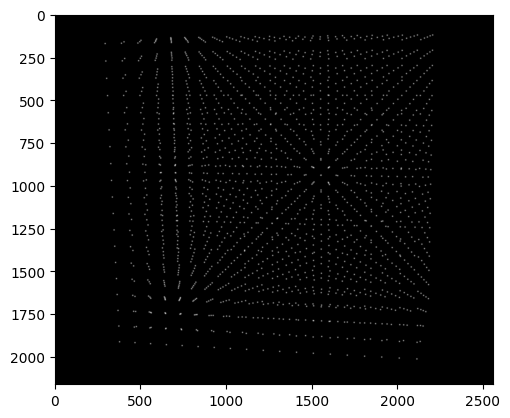

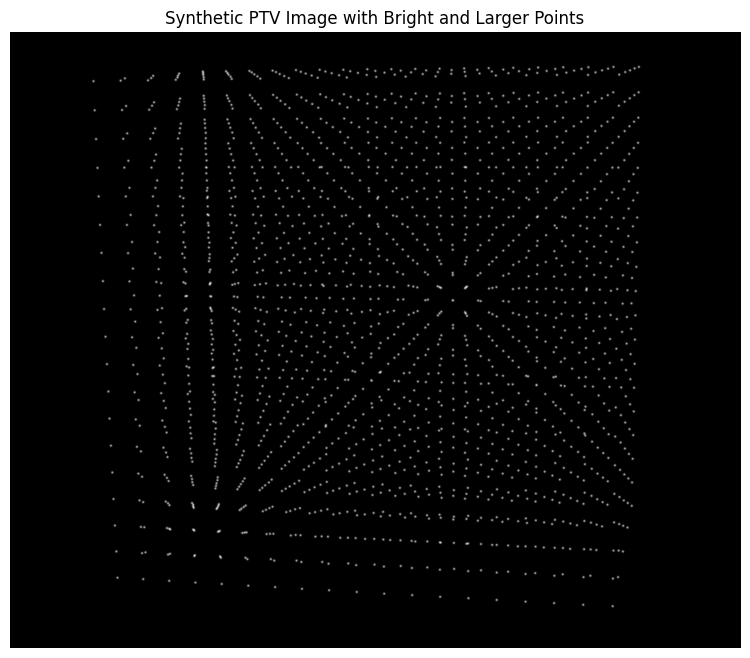

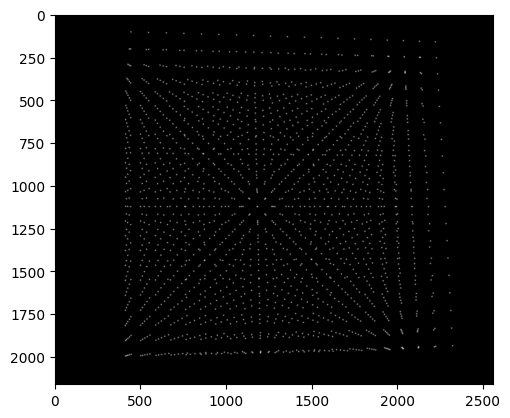

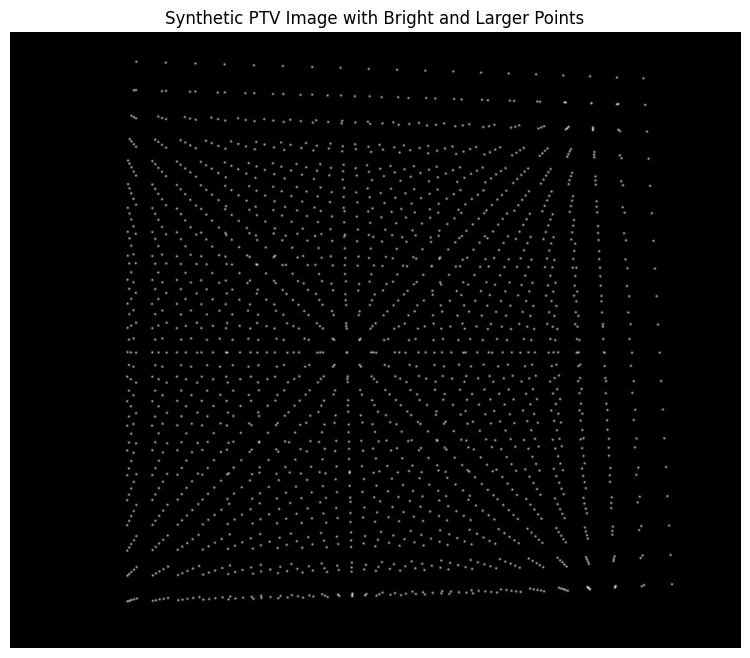

In [43]:
from scipy.ndimage.filters import gaussian_filter

for cam in params.cams:
    xy = markers[cam][:,:2]
        
    # Set the image dimensions and pixel size
    imx, imy = 2560, 2160  # dimensions of the image
    pixel_size = 0.0065  # size of each pixel

    # Create an empty image
    image = np.zeros((imy, imx), dtype=np.uint8)

    # Size of each point in pixels
    point_radius = 3  # radius of 5 pixels for each point

    # Convert coordinates to pixel indices and set pixel values
    for coord in xy:
        x, y = coord
        ix = int(x)
        iy = int(y)
        if 0 <= ix < imx and 0 <= iy < imy:
            # Draw a circle with the specified radius
            for dx in range(-point_radius, point_radius + 1):
                for dy in range(-point_radius, point_radius + 1):
                    if dx**2 + dy**2 <= point_radius**2:
                        if 0 <= ix + dx < imx and 0 <= iy + dy < imy:
                            image[iy + dy, ix + dx] = 255  # Set to maximum intensity for better visibility


    image = gaussian_filter(image, sigma=2)

    plt.figure()
    plt.imshow(image, cmap='gray')


    # Save the image as a PNG file for display
    output_png_path = 'cam'+str(cam+1)+'.tif'
    imageio.imwrite(output_png_path, image)

    # Display the image as PNG
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap='gray')
    plt.title('Synthetic PTV Image with Bright and Larger Points')
    plt.axis('off')
    plt.show()
